## Desafio Sklearn Rocketseat

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [1]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# dict
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [3]:
df_vendas.head(13)

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [4]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [7]:
# Label encoding
mes_to_num = {mes: num for num, mes in enumerate(dados_vendas['mes'])}
df_vendas['mes_num'] = df_vendas['mes'].map(mes_to_num)
print(df_vendas.head())

         mes  vendas  mes_num
0    Janeiro    2000        0
1  Fevereiro    2200        1
2      Março    2300        2
3      Abril    2500        3
4       Maio    2600        4


<AxesSubplot:>

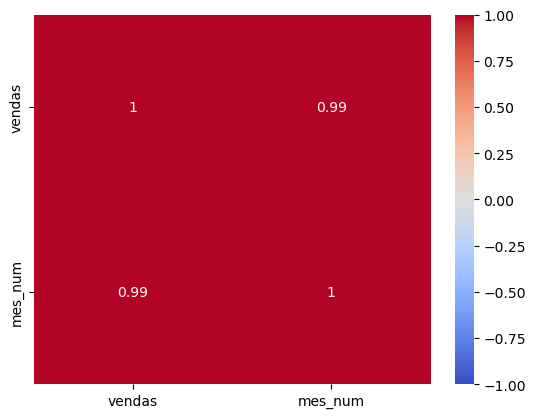

In [9]:
# Correlation matrix
sns.heatmap(df_vendas.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

<AxesSubplot:>

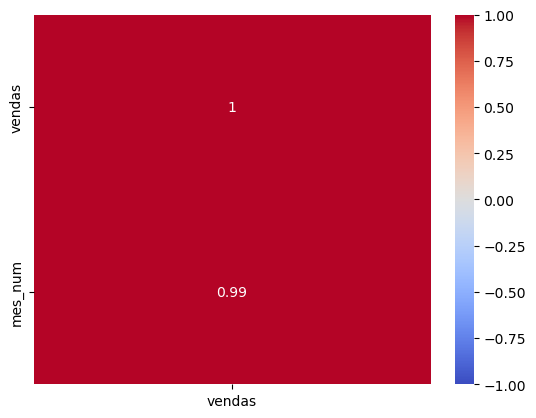

In [10]:
# Correlation with the target variable
sns.heatmap(df_vendas.corr()[['vendas']].sort_values(by='vendas', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

## Modelo com todos os meses

In [12]:
# model 1 
X = df_vendas[['mes_num']]
y = df_vendas['vendas']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)


In [13]:
# Train the model 1
model_1 = LinearRegression().fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(f"Previsão de vendas: {y_pred}")
    

Previsão de vendas: [2420.         2876.66666667 2305.83333333 2762.5       ]


In [14]:
model_1.coef_

array([114.16666667])

In [15]:
model_1.intercept_

2077.5

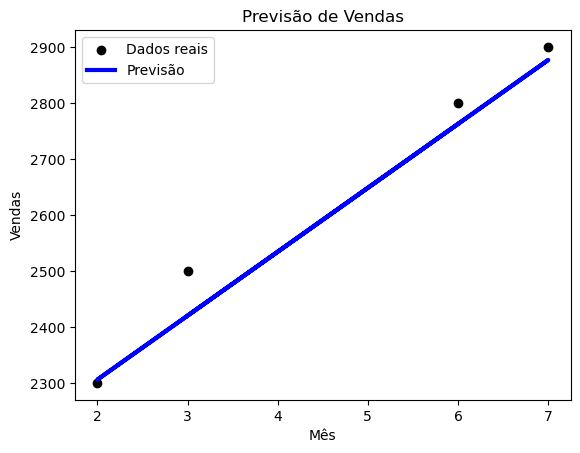

In [16]:
# Scatter plot dos dados de teste
plt.scatter(X_test, y_test, color='black', label='Dados reais')

# Plotar a linha de previsão
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Previsão')

plt.title('Previsão de Vendas')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.show()


## Modelo prevendo as vendas de dezembro

In [18]:
# splt data 2
X2 = df_vendas[['mes_num']]
y2 = df_vendas['vendas']

# Dados de treino (Janeiro a Novembro)
X_train2 = X2[X2['mes_num'] != 11]  
y_train2 = y2[X2['mes_num'] != 11]

# Dados de teste (Apenas Dezembro)
X_test2 = X2[X2['mes_num'] == 11]  
y_test2 = y2[X2['mes_num'] == 11]

In [19]:
# Train the model 2
model_2 = LinearRegression().fit(X_train2, y_train2)
y_pred2 = model_1.predict(X_test2)
print(f"Previsão de vendas: {y_pred2}")

Previsão de vendas: [3333.33333333]


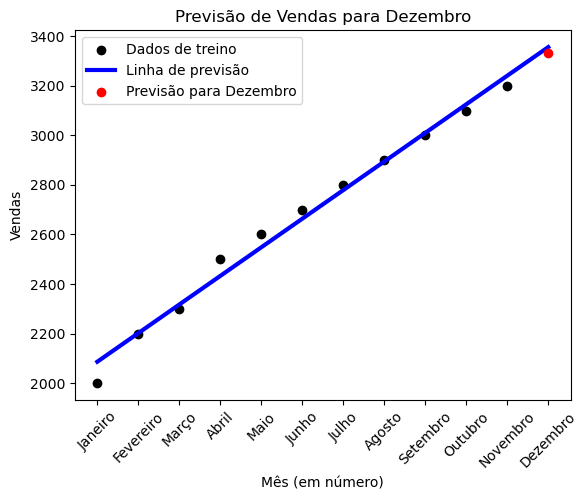

In [23]:
# Scatter plot dos dados de treino
plt.scatter(X_train2['mes_num'], y_train2, color='black', label='Dados de treino')

# Plotar a linha de previsão para todos os meses
meses_todos = df_vendas[['mes_num']]
previsoes_todos = model_2.predict(meses_todos)

plt.plot(meses_todos, previsoes_todos, color='blue', linewidth=3, label='Linha de previsão')

# Plotar a previsão específica para dezembro
plt.scatter(X_test2['mes_num'], y_pred2, color='red', label='Previsão para Dezembro', zorder=5)

plt.title('Previsão de Vendas para Dezembro')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.xticks(range(12), dados_vendas['mes'], rotation=45)
plt.show()


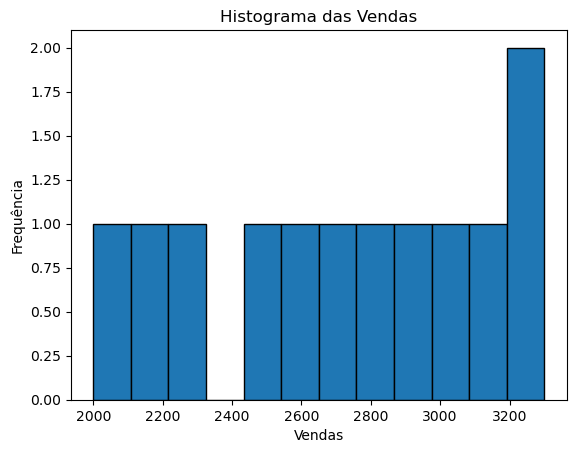

In [25]:
# histogram
plt.hist(df_vendas['vendas'], bins=12, edgecolor='black')
plt.title('Histograma das Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()

